<a href="https://colab.research.google.com/github/NAVEED261/MY-AI-ASSISTANT/blob/main/practice_connectingn_multi_agent_with_llm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
%pip install -q -U langchain langgraph
%pip install -q -U langchain-google-genai langchain_core

In [28]:
from google.colab import userdata
google_api_key = userdata.get('my_stenographer_key')
from google.colab import userdata
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.messages.ai import AIMessage
from IPython.display import Image, display # Preview Graph
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.state import CompiledStateGraph # type
llm: ChatGoogleGenerativeAI = ChatGoogleGenerativeAI(
    model="gemini-1.5-flash",  # Specify the model to use
    api_key=google_api_key,     # Provide the Google API key for authentication
)


In [29]:
class FirstLLMAgentCall(TypedDict):
    prompt: str
    output: str
    # this is state or structure

In [30]:
def node_1(state: FirstLLMAgentCall):
  # state ek dictionary hogi us ma prompt hoga
    print("---Node 1---", state)
    # initially state ko print krwaya

    call_llm = state["prompt"]
    # state k ma jo b new prompt hoga wo call_llm ma store hoga
    response = llm.invoke(call_llm)
    # llm ko call kr k new prompt lya or response ma stre krdya
    return {"output": response.content}
    # state ka jo b output ai ga .content ma rakhana
def node_2(state: FirstLLMAgentCall):
  # state ek dictionary hogi us ma prompt hoga
    print("---Node 2---", state)
    # initially state ko print krwaya

    call_llm = state["prompt"]
    # state k ma jo b new prompt hoga wo call_llm ma store hoga
    response = llm.invoke(call_llm)
    # llm ko call kr k new prompt lya or response ma stre krdya
    return {"output": response.content}
    # state ka jo b output ai ga .content ma rakhana
def node_3(state: FirstLLMAgentCall):
  # state ek dictionary hogi us ma prompt hoga
    print("---Node 3--", state)
    # initially state ko print krwaya

    call_llm = state["prompt"]
    # state k ma jo b new prompt hoga wo call_llm ma store hoga
    response = llm.invoke(call_llm)
    # llm ko call kr k new prompt lya or response ma stre krdya
    return {"output": response.content}
    # state ka jo b output ai ga .content ma rakhana


In [31]:
import random

random.random()


0.694730339739731

In [32]:
import random

number: float = random.random()

if number < 0.5:
    print("go to node_2!")
else:
    print("go to node_3")

# What does this do?
# The code generates a random number between 0 and 1 and checks if it is less than 0.5.
# If it's less than 0.5, it prints "The random number is less than 0.5!".
# If it's 0.5 or more, it prints "The random number is 0.5 or more!".
# The output will be different every time because of the random number!

go to node_2!


In [33]:
import random
from typing import Literal

def decide_mood(state: FirstLLMAgentCall) -> Literal["node_2", "node_3"]:

    # Often, we will use state to decide on the next node to visit
    user_input = state['user_input']

    # Here, let's just do a 50 / 50 split between nodes 2, 3
    if random.random() < 0.5:

        # 50% of the time, we return Node 2
        return "node_2"

    # 50% of the time, we return Node 3
    return "node_3"

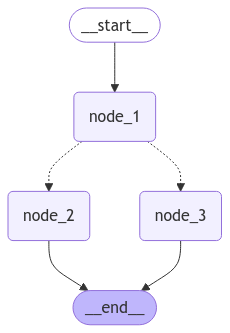

In [34]:
# Build graph
builder: StateGraph = StateGraph(FirstLLMAgentCall)
builder.add_node("node_1", node_1)
builder.add_node("node_2", node_2)
builder.add_node("node_3", node_3)

# Logic
builder.add_edge(START, "node_1")
builder.add_conditional_edges("node_1", decide_mood)
builder.add_edge("node_2", END)
builder.add_edge("node_3", END)


# Add
graph: CompiledStateGraph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [35]:
graph.invoke({" prompt" : "Hi, this is Lance."})

InvalidUpdateError: Expected node prompt to update at least one of ['prompt', 'output'], got {' prompt': 'Hi, this is Lance.'}

go to node_2!


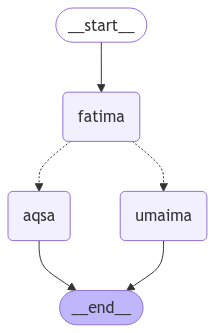

---Node 1--- {'prompt': 'Hello world'}
---Node 3-- {'prompt': 'Hello world', 'output': AIMessage(content='Hello there! It\'s nice to "meet" you. What can I do for you today? \n', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': [{'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HARASSMENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'probability': 'NEGLIGIBLE', 'blocked': False}]}, id='run-32f7e4c5-1924-4451-b473-45cd80546e67-0', usage_metadata={'input_tokens': 3, 'output_tokens': 21, 'total_tokens': 24, 'input_token_details': {'cache_read': 0}})}


{'prompt': 'Hello world',
 'output': AIMessage(content="Hello world! It's nice to hear from you. What can I do for you today? \n", additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': [{'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HARASSMENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'probability': 'NEGLIGIBLE', 'blocked': False}]}, id='run-a1a6af7d-3b5a-4034-b97d-e972f79a4cb1-0', usage_metadata={'input_tokens': 3, 'output_tokens': 21, 'total_tokens': 24, 'input_token_details': {'cache_read': 0}})}

In [47]:
# prompt: plz solve of last prompt error

from google.colab import userdata
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.messages.ai import AIMessage
from IPython.display import Image, display # Preview Graph
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.state import CompiledStateGraph # type
import random
from typing import Literal
# %pip install -q -U langchain langgraph
# %pip install -q -U langchain-google-genai langchain_core


# Assuming you have set your Google API key in userdata as 'my_stenographer_key'
google_api_key = userdata.get('my_stenographer_key')

if google_api_key is None:
    raise ValueError("Google API key not found in userdata. Please set it as 'my_stenographer_key'.")

llm: ChatGoogleGenerativeAI = ChatGoogleGenerativeAI(
    model="gemini-1.5-flash",  # Specify the model to use
    api_key=google_api_key,     # Provide the Google API key for authentication
)

class FirstLLMAgentCall(TypedDict):
    prompt: str
    output: str

    # this is state or structure


def node_1(state: FirstLLMAgentCall):
  # state ek dictionary hogi us ma prompt hoga
    print("---Node 1---", state)
    # initially state ko print krwaya

    call_llm = state["prompt"]
    # state k ma jo b new prompt hoga wo call_llm ma store hoga
    response = llm.invoke(call_llm)
    # llm ko call kr k new prompt lya or response ma stre krdya
    return {"output": response}
    # state ka jo b output ai ga .content ma rakhana


def node_2(state: FirstLLMAgentCall):
  # state ek dictionary hogi us ma prompt hoga
    print("---Node 2---", state)
    # initially state ko print krwaya

    call_llm = state["prompt"]
    # state k ma jo b new prompt hoga wo call_llm ma store hoga
    response = llm.invoke(call_llm)
    # llm ko call kr k new prompt lya or response ma stre krdya
    return {"output": response}
    # state ka jo b output ai ga .content ma rakhana


def node_3(state: FirstLLMAgentCall):
  # state ek dictionary hogi us ma prompt hoga
    print("---Node 3--", state)
    # initially state ko print krwaya

    call_llm = state["prompt"]
    # state k ma jo b new prompt hoga wo call_llm ma store hoga
    response = llm.invoke(call_llm)
    # llm ko call kr k new prompt lya or response ma stre krdya
    return {"output": response}
    # state ka jo b output ai ga .content ma rakhana


random.random()


number: float = random.random()

if number < 0.5:
    print("go to node_2!")
else:
    print("go to node_3")

# What does this do?
# The code generates a random number between 0 and 1 and checks if it is less than 0.5.
# If it's less than 0.5, it prints "The random number is less than 0.5!".
# If it's 0.5 or more, it prints "The random number is 0.5 or more!".
# The output will be different every time because of the random number!

def decide_mood(state: FirstLLMAgentCall) -> Literal["umaima", "aqsa"]:

    # Often, we will use state to decide on the next node to visit


    # Here, let's just do a 50 / 50 split between nodes 2, 3
    if random.random() < 0.5:

        # 50% of the time, we return Node 2
        return "umaima"

    # 50% of the time, we return Node 3
    return "aqsa"


# Build graph
builder: StateGraph = StateGraph(FirstLLMAgentCall)
builder.add_node("fatima", node_1)
builder.add_node("umaima", node_2)
builder.add_node("aqsa", node_3)

# Logic
builder.add_edge(START, "fatima")
builder.add_conditional_edges("fatima", decide_mood)
builder.add_edge("umaima", END)
builder.add_edge("aqsa", END)


# Add
graph: CompiledStateGraph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))
graph.invoke({"prompt": "Hello world", "user_input" : "Hi, this is Lance."})

In [44]:
graph.invoke({"prompt": "do u know about pakistan"})

---Node 1--- {'prompt': 'do u know about pakistan'}
---Node 3-- {'prompt': 'do u know about pakistan', 'output': AIMessage(content="Yes, I do! I have access to a vast amount of information about Pakistan, including:\n\n* **Geography:**  Location, climate, topography, major cities, natural resources.\n* **History:**  From ancient civilizations to the modern era, including the partition of India, political developments, and key historical figures.\n* **Culture:**  Languages, traditions, art, music, cuisine, festivals, and social customs.\n* **Economy:**  Industries, agriculture, trade, GDP, and major economic challenges.\n* **Politics:**  Government structure, political parties, elections, and current events.\n* **Society:**  Demographics, education, healthcare, social issues, and gender equality.\n\n**What specifically would you like to know about Pakistan?** \n\nFor example, you could ask:\n\n* What are the major tourist attractions in Pakistan?\n* What are the challenges facing Pakist

{'prompt': 'do u know about pakistan',
 'output': AIMessage(content="Yes, I do! I have access to a vast amount of information about Pakistan, including:\n\n* **Geography:** I know about its location, terrain, climate, and major cities.\n* **History:** I'm familiar with its history, from its ancient origins to its independence in 1947. \n* **Culture:** I can tell you about its diverse cultures, languages, religions, traditions, and arts. \n* **Politics:** I know about its government, political system, and major political figures.\n* **Economy:** I'm aware of its economic structure, industries, and challenges.\n* **Society:** I have information about its demographics, social issues, and quality of life.\n\n**What would you like to know about Pakistan?**\n\nPlease be specific with your question so I can provide you with the most relevant information. For example, you could ask:\n\n* What are the main religions practiced in Pakistan?\n* What are some famous landmarks in Pakistan?\n* What a

In [45]:
graph.invoke({"prompt": "what is current date in pakistan"})

---Node 1--- {'prompt': 'what is current date in pakistan'}
---Node 3-- {'prompt': 'what is current date in pakistan', 'output': AIMessage(content="I do not have access to real-time information, including the current date. To get the current date in Pakistan, I recommend checking a reliable online source or your device's clock if it is set to the correct time zone. \n", additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': [{'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HARASSMENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'probability': 'NEGLIGIBLE', 'blocked': False}]}, id='run-c9c9f9b7-c6e7-40dc-831d-b0fd7e7c97e2-0', usage_metadata={'input_tokens': 7, 'output_tokens': 47, 't

{'prompt': 'what is current date in pakistan',
 'output': AIMessage(content='I do not have access to real-time information, including the current date in Pakistan. To get the most up-to-date information, I recommend checking a reliable online source such as a time zone website or a news website. \n', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': [{'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HARASSMENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'probability': 'NEGLIGIBLE', 'blocked': False}]}, id='run-2f34a81b-6b51-4141-a6aa-285003c5ecd2-0', usage_metadata={'input_tokens': 7, 'output_tokens': 47, 'total_tokens': 54, 'input_token_details': {'cache_read': 0}})}